In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
data = pd.read_csv('./IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

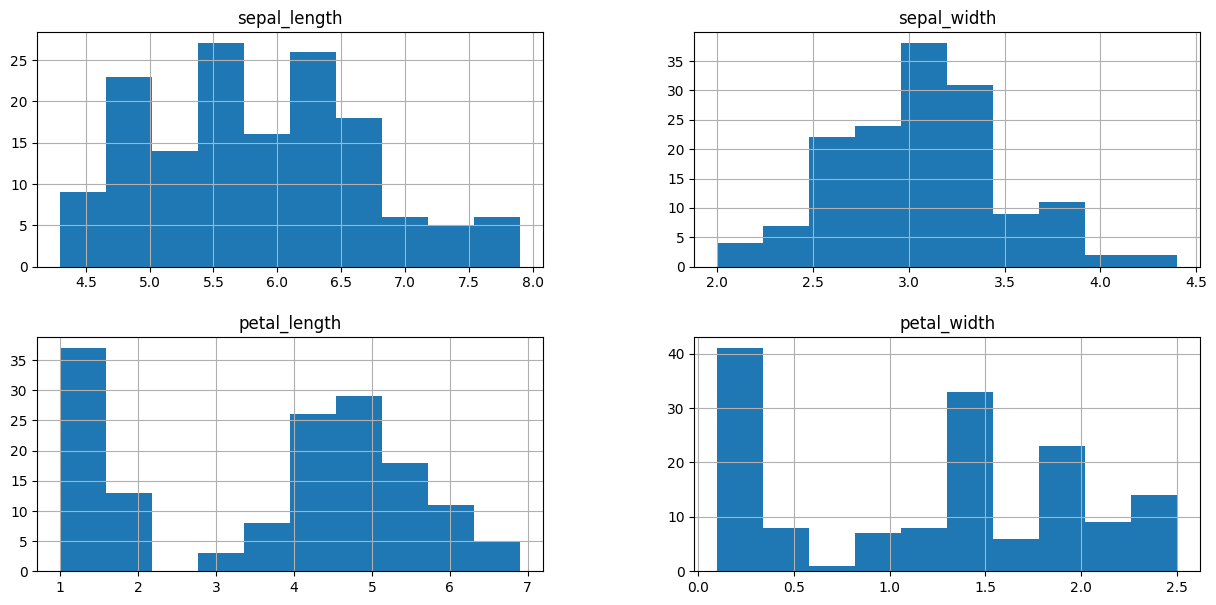

In [ ]:
vis = data.drop(columns=['species'])
vis.hist(figsize=(15, 7))

In [ ]:
colors = ['green', 'deeppink', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

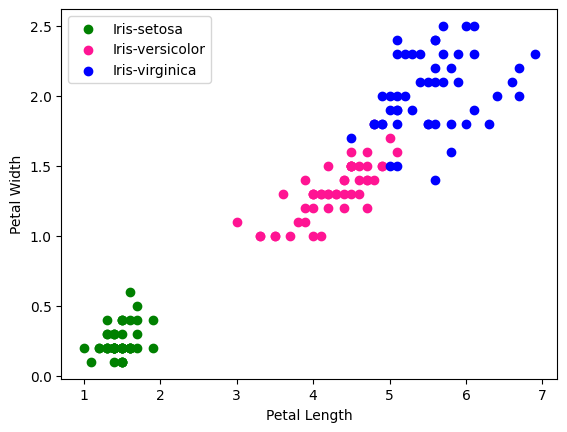

In [ ]:
for i in range(3):
  x = data[data['species']==species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

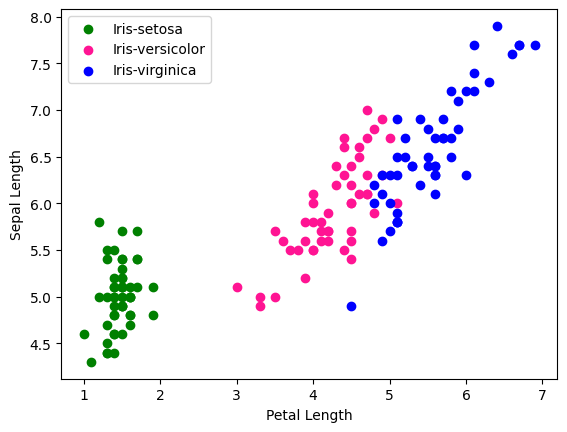

In [ ]:
for i in range(3):
  x = data[data['species']==species[i]]
  plt.scatter(x['petal_length'], x['sepal_length'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.legend()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model

In [ ]:
le = LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
Kmodel = KNeighborsClassifier()

In [ ]:
Kmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = Kmodel.predict(x_test)

In [ ]:
print("Accuracy: ", Kmodel.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        17
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
svm_model = SVC(kernel='rbf', C=1, gamma='auto')
svm_model.fit(x_train, y_train)
y_predi = svm_model.predict(x_test)

In [ ]:
print("Accuracy: ", svm_model.score(x_test, y_test)*100)

Accuracy:  100.0


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_predi))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
logr_model = linear_model.LogisticRegression()
logr_model.fit(x_train, y_train)
y_predic = logr_model.predict(x_test)

In [ ]:
print("Accuracy: ", logr_model.score(x_test, y_test)*100)

Accuracy:  100.0


In [ ]:
print('Classification Report:\n', classification_report(y_test, y_predic))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

